In [3]:
! pip install pyemma
! pip install numpy==1.23

In [4]:
!curl -L https://uwmadison.box.com/shared/static/xemwq0f2mbpob19el6xxlvca8gl45f9v --output ftrajs.npy
!wget https://github.com/xuhuihuang/GME_tutorials/raw/main/decomposition/FeatureSelection.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    10    0    10    0     0     11      0 --:--:-- --:--:-- --:--:-- 10000
100 1716M  100 1716M    0     0  75.3M      0  0:00:22  0:00:22 --:--:-- 76.9M
--2024-08-12 02:40:46--  https://github.com/xuhuihuang/GME_tutorials/raw/main/decomposition/FeatureSelection.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xuhuihuang/GME_tutorials/main/decomposition/FeatureSelection.py [following]
--2024-08-12 02:40:46--  https://raw.githubusercontent.com/xuhuihuang/GME_tutorials/main/decomposition/FeatureSelection.py
R

In [ ]:
# This step can take time
# More details: https://github.com/xuhuihuang/GME_tutorials/blob/main/tutorials/villin_headpiece/Feature_Selection.ipynb

In [5]:
# @title Import necessary packages
import pyemma
import pyemma.coordinates
from pyemma.coordinates import tica
import FeatureSelection

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import os
import sys

In [6]:
# @title Default title text
ftrajs = np.load("ftrajs.npy", allow_pickle=True)
n_features = ftrajs[0].shape[1] # the number of all the features from featurization
num_every_iter = 3 # the number of selected features in each iteration

# Feature Selection
featureselect = FeatureSelection.spectral_oasis(num_select=n_features, num_every_iter=num_every_iter,
                                                method='spectral-oasis', random_seed=42,
                                                covariance=True)
featureselect.select(ftrajs)
select_columns = featureselect.select_columns

feature selection: 100%|██████████| 14/14 [00:00<00:00, 107.52it/s]


In [7]:
print(select_columns)

[39 25 26  6  7 23 19 21 37  8 22 36 18 27 43  4 13 29 14 32 38  1 12 20
 15 34 42  2 17 33  3 28 35  5 30 44 16 24 41  9 31 40  0 10 11]


In [8]:
fftrajs = []
for i in range(len(ftrajs)):
  fftrajs.append(ftrajs[i])

In [18]:
n_timescales = 3 # the number of dynamic modes considered in validation

# Feature Selection Validation based on tICA timescales
timescales = []
for i in range(int(n_features//num_every_iter)):
    num_sel_cols = num_every_iter * (i+1)

    # Skip when the number of selected features is smaller than the number of pre-set dynamic modes
    if num_sel_cols <= n_timescales:
        continue

    # Calculate the timescales of the trajectories with the selected features
    oasistrajs = []
    for key in range(len(ftrajs)):
        oasistrajs.append(ftrajs[key][:, select_columns[:num_sel_cols]])

    TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,
                reversible=True, var_cutoff=1, epsilon=0)
    TICA.fit(oasistrajs)
    timescales.append([num_sel_cols, TICA.timescales[:n_timescales]])
    del TICA

if n_features % num_every_iter != 0:
    TICA = tica(lag=100, dim=n_timescales, kinetic_map=True,
                reversible=True, var_cutoff=1, epsilon=0)
    TICA.fit(ftrajs)
    timescales.append([n_features, TICA.timescales[:n_timescales]])

timescales = np.array(timescales, dtype=object)

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-18-21e29addfc5f>:17: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-18-21e29addfc5f> line 17. Use deeptime.decomposition.TICA instead.
  TICA = tica(lag=10, dim=n_timescales, kinetic_map=True,


calculate covariances:   0%|          | 0/100 [00:00<?, ?it/s]

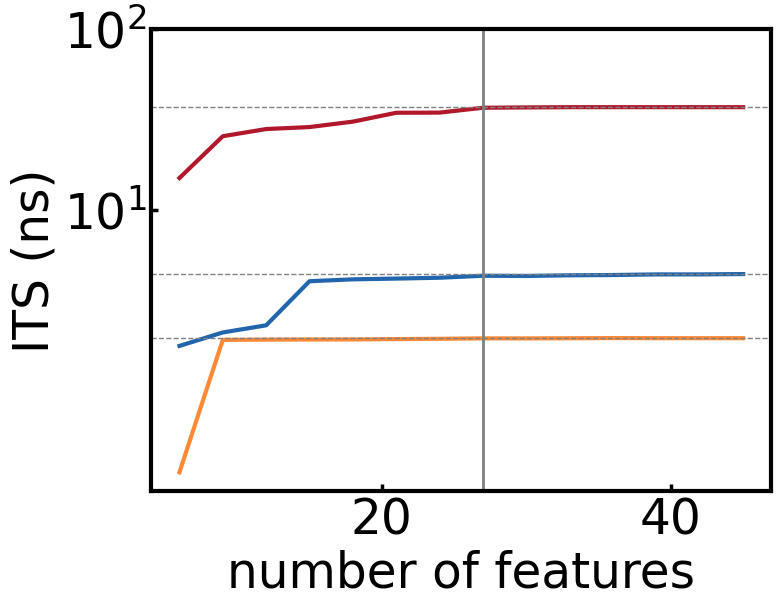

In [24]:
delta_t = 0.1 # unit time of each frame, here in nanosecond

# Take the logarithm
log_timescales = np.zeros((len(timescales), 3))
for i in range(len(timescales)):
    log_timescales[i] = np.log10(timescales[:, 1][i] * delta_t)

plt.rcParams['font.size'] = 35
colors = ['#b2182b','#2166ac','#ff8936']

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    plt.plot(timescales[:, 0], log_timescales[:,i], linewidth=3, color=colors[i])
    plt.axhline(y= log_timescales[-1,i], color='grey', linewidth=1, linestyle='--')
plt.axvline(x=27, color='grey', linewidth=2, linestyle='-')
plt.xlabel('number of features')
plt.ylabel('ITS (ns)')
plt.yticks([1, 2], labels=['$10^{1}$', '$10^{2}$'])
# plt.xticks([100, 200, 300, 400, 500])
# plt.ylim(0.5, 3.5)
ax.tick_params(axis='both', direction='in', width=2.5, length=5)
for spine in ax.spines.values():
    spine.set_linewidth(3)

plt.show()